In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
coeffs_dict = readstring("./results_Sioux/coeffs_dict_Sioux.json")
coeffs_dict = JSON.parse(coeffs_dict)

Dict{String,Any} with 60 entries:
  "(6,1.5,0.1)"   => Any[1.0,-0.0172412,-0.00871717,0.0513166,0.103706,0.015805…
  "(5,1.5,0.1)"   => Any[1.0,-0.0325824,0.0491784,-0.032753,0.15922,-0.0012055]
  "(4,1.0,1.0)"   => Any[1.0,0.00430119,-0.0429718,0.029832,0.142041]
  "(3,1.5,0.1)"   => Any[1.0,0.243822,-0.635309,0.53822]
  "(3,0.5,1.0)"   => Any[1.0,-0.027205,-0.0274349,0.178105]
  "(6,1.0,0.01)"  => Any[1.0,-0.0214403,0.00411113,0.0354258,0.112948,0.0132253…
  "(5,1.0,0.1)"   => Any[1.0,-0.00629711,0.00729829,-0.00427747,0.151309,-0.000…
  "(6,1.0,0.1)"   => Any[1.0,-0.0160728,-0.0124012,0.0561344,0.100753,0.0166681…
  "(6,0.5,0.01)"  => Any[1.0,-0.0166371,-0.0106545,0.0539447,0.102075,0.0162821…
  "(6,1.0,10.0)"  => Any[1.0,-0.00855313,0.0027773,0.0580249,0.0818955,0.028083…
  "(5,0.5,0.01)"  => Any[1.0,-0.0172472,0.0287388,-0.0224274,0.157826,-0.001144…
  "(3,1.5,10.0)"  => Any[1.0,-0.023494,0.0223752,0.0451952]
  "(6,1.5,100.0)" => Any[1.0,-0.0083472,0.0165901,0.0662925,0.072448,0.0

In [3]:
deg = 3
c = 0.5
lam = 0.01

0.01

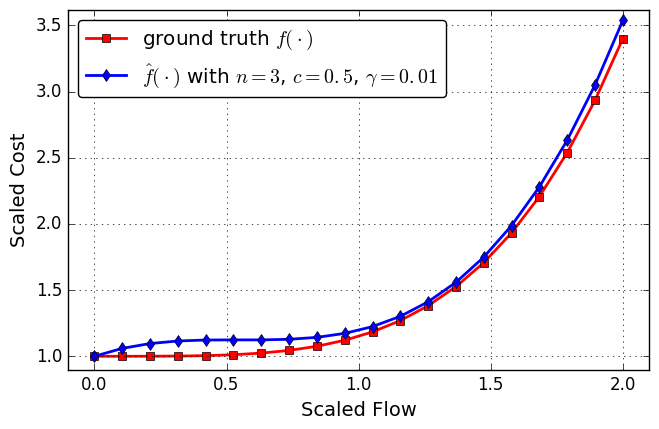

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'rm'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [4]:
using PyPlot

PyPlot.figure(figsize=(7.5, 4.5))

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict["($deg,$c,$lam)"]

xs = linspace(0, 2, 20)
ys_true = map(x->polyEval(true_coeffs, x), xs)

ys = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=2)
PyPlot.plot(xs, ys, "d-b", label=L"$\hat f(\cdot)$ with $n = 3$, $c = 0.5$, $\gamma = 0.01$", 
linewidth=2)

legend(loc="upper left", fancybox="true", numpoints=1) 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.62);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Sioux/fitting_Sioux_multi_class_$(deg)_$(c)_$(lam).pdf")

In [5]:
deg_1 = 3
c_1 = 1.5
lam_1 = 0.01

deg_2 = 4
c_2 = 1.5
lam_2 = 0.01

deg_3 = 5
c_3 = 1.5
lam_3 = 0.01

deg_4 = 6
c_4 = 1.5
lam_4 = 0.01

0.01

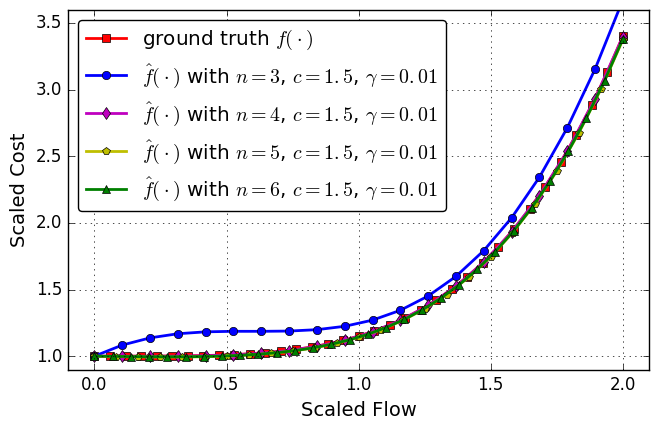

In [6]:
using PyPlot

PyPlot.figure(figsize=(7.5, 4.5))

true_coeffs = [1, 0, 0, 0, 0.15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["($deg_1,$c_1,$lam_1)"]
est_coeffs_2 = coeffs_dict["($deg_2,$c_2,$lam_2)"]
est_coeffs_3 = coeffs_dict["($deg_3,$c_3,$lam_3)"]
est_coeffs_4 = coeffs_dict["($deg_4,$c_4,$lam_4)"]

xs_true = linspace(0, 2, 35)
xs_1 = linspace(0, 2, 20)
xs_2 = linspace(0, 2, 20)
xs_3 = linspace(0, 2, 25)
xs_4 = linspace(0, 2, 30)

ys_true = map(x->polyEval(true_coeffs, x), xs_true)

ys_1 = map(x->polyEval(est_coeffs_1, x), xs_1)
ys_2 = map(x->polyEval(est_coeffs_2, x), xs_2)
ys_3 = map(x->polyEval(est_coeffs_3, x), xs_3)
ys_4 = map(x->polyEval(est_coeffs_4, x), xs_4)

PyPlot.plot(xs_true, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=2)
PyPlot.plot(xs_1, ys_1, "o-b", label=L"$\hat f(\cdot)$ with $n = 3$, $c = 1.5$, $\gamma = 0.01$", 
linewidth=2)
PyPlot.plot(xs_2, ys_2, "d-m", label=L"$\hat f(\cdot)$ with $n = 4$, $c = 1.5$, $\gamma = 0.01$", 
linewidth=2)
PyPlot.plot(xs_3, ys_3, "p-y", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 0.01$", 
linewidth=2)
PyPlot.plot(xs_4, ys_4, "^-g", label=L"$\hat f(\cdot)$ with $n = 6$, $c = 1.5$, $\gamma = 0.01$", 
linewidth=2)

legend(loc="upper left", fancybox="true", numpoints=1) 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.6);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Sioux/fitting_Sioux_multi_class_n.pdf")

In [7]:
deg_1 = 5
c_1 = 0.5
lam_1 = 10.0

deg_2 = 5
c_2 = 1.0
lam_2 = 10.0

deg_3 = 5
c_3 = 1.5
lam_3 = 10.0

10.0

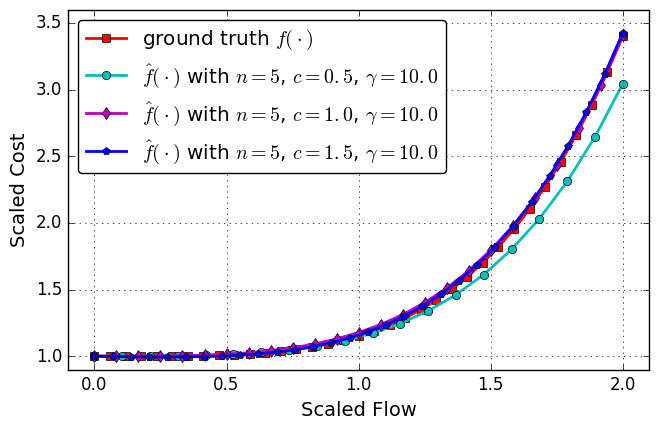

In [8]:
using PyPlot

PyPlot.figure(figsize=(7.5, 4.5))

true_coeffs = [1, 0, 0, 0, 0.15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["($deg_1,$c_1,$lam_1)"]
est_coeffs_2 = coeffs_dict["($deg_2,$c_2,$lam_2)"]
est_coeffs_3 = coeffs_dict["($deg_3,$c_3,$lam_3)"]

xs_true = linspace(0, 2, 35)
xs_1 = linspace(0, 2, 20)
xs_2 = linspace(0, 2, 25)
xs_3 = linspace(0, 2, 30)
ys_true = map(x->polyEval(true_coeffs, x), xs_true)

ys_1 = map(x->polyEval(est_coeffs_1, x), xs_1)
ys_2 = map(x->polyEval(est_coeffs_2, x), xs_2)
ys_3 = map(x->polyEval(est_coeffs_3, x), xs_3)

PyPlot.plot(xs_true, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=2)
PyPlot.plot(xs_1, ys_1, "o-c", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 0.5$, $\gamma = 10.0$", 
linewidth=2)
PyPlot.plot(xs_2, ys_2, "d-m", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.0$, $\gamma = 10.0$", 
linewidth=2)
PyPlot.plot(xs_3, ys_3, "p-b", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 10.0$", 
linewidth=2)

legend(loc="upper left", fancybox="true", numpoints=1) 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.6);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Sioux/fitting_Sioux_multi_class_c.pdf")

In [9]:
deg_1 = 5
c_1 = 1.5
lam_1 = 0.01

deg_2 = 5
c_2 = 1.5
lam_2 = 0.1

deg_3 = 5
c_3 = 1.5
lam_3 = 1.0

deg_4 = 5
c_4 = 1.5
lam_4 = 10.0

deg_5 = 5
c_5 = 1.5
lam_5 = 100.0

100.0

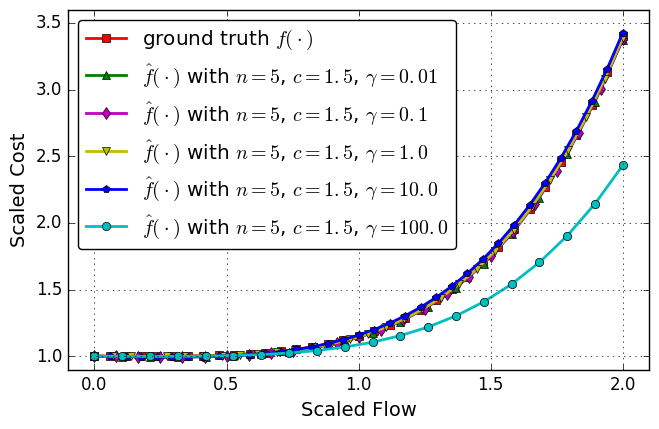

In [10]:
using PyPlot

PyPlot.figure(figsize=(7.5, 4.5))

true_coeffs = [1, 0, 0, 0, 0.15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["($deg_1,$c_1,$lam_1)"]
est_coeffs_2 = coeffs_dict["($deg_2,$c_2,$lam_2)"]
est_coeffs_3 = coeffs_dict["($deg_3,$c_3,$lam_3)"]
est_coeffs_4 = coeffs_dict["($deg_4,$c_4,$lam_4)"]
est_coeffs_5 = coeffs_dict["($deg_5,$c_5,$lam_5)"]

xs_true = linspace(0, 2, 35)
xs_1 = linspace(0, 2, 20)
xs_2 = linspace(0, 2, 25)
xs_3 = linspace(0, 2, 30)
xs_4 = linspace(0, 2, 35)
xs_5 = linspace(0, 2, 20)

ys_true = map(x->polyEval(true_coeffs, x), xs_true)
ys_1 = map(x->polyEval(est_coeffs_1, x), xs_1)
ys_2 = map(x->polyEval(est_coeffs_2, x), xs_2)
ys_3 = map(x->polyEval(est_coeffs_3, x), xs_3)
ys_4 = map(x->polyEval(est_coeffs_4, x), xs_4)
ys_5 = map(x->polyEval(est_coeffs_5, x), xs_5)

PyPlot.plot(xs_true, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=2)
PyPlot.plot(xs_1, ys_1, "^-g", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 0.01$", 
linewidth=2)
PyPlot.plot(xs_2, ys_2, "d-m", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 0.1$", 
linewidth=2)
PyPlot.plot(xs_3, ys_3, "v-y", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 1.0$", 
linewidth=2)
PyPlot.plot(xs_4, ys_4, "p-b", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 10.0$", 
linewidth=2)
PyPlot.plot(xs_5, ys_5, "o-c", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 100.0$", 
linewidth=2)

legend(loc="upper left", fancybox="true", numpoints=1) 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.6);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Sioux/fitting_Sioux_multi_class_gamma.pdf")